In [1]:
from bloqade import rydberg_h, piecewise_linear,get_capabilities,  piecewise_constant, waveform, cast
from bloqade.atom_arrangement import ListOfLocations, Lieb, Square, Chain, Honeycomb, Kagome, Triangular, Rectangular
from bokeh.io import output_notebook # to plot "show()" on the notebook, without opening a browser
import networkx as nx
import os
import matplotlib.pyplot as plt
import numpy as np
output_notebook()

Loading BokehJS ...

# Supponiamo che tu abbia le coordinate degli atomi (posizioni in micron)
#atom_coordinate_1 = [(0.0, 0.0), (0, 9), (9, 0), (9, 9), (0, 18), (18, 9)]
#atom_coordinate_1 = [(0.0, 0.0), (0, 9), (9, 0), (9, 9),(18,9),(0,19)]
atom_coordinate_1 = [(0,10),(10,0), (10,10),(10,20),(20,10)]
atom_coordinate_1=[(0,18),(9,9),(9,18),(18,18),(9,9*3)]
#atom_coordinate_1=[(0,18),(9,9),(9,18),(18,18),(9,9*3)]
#atom_coordinate_1=[(0,0),(0,9)]





In [2]:
def getMHz(Rb, C6 = float(get_capabilities().capabilities.rydberg.c6_coefficient)):
    return C6 / (Rb ** 6)

Rb = 9.5
omega_MHz_value = getMHz(Rb)

omega_MHz = [0.0, omega_MHz_value, omega_MHz_value,omega_MHz_value,omega_MHz_value, 0.0]
delta_MHz = [-omega_MHz_value, -omega_MHz_value,0 ,0,omega_MHz_value, omega_MHz_value]
#durations = [ 0.25,1,0.5,2, 0.25]
durations = [ 0.25,1,0.1,2.4, 0.25]


Delta = piecewise_linear(durations, [x  for x in delta_MHz])
Omega = piecewise_linear(durations, [x for x in omega_MHz])
"""""
# Crea l'Hamiltoniana
program = rydberg_h(atom_coordinate_1, detuning=Delta, amplitude=Omega, phase=None)

# Mostra i risultati
program.parse_register().show()
program.parse_sequence().show()
"""""

'""\n# Crea l\'Hamiltoniana\nprogram = rydberg_h(atom_coordinate_1, detuning=Delta, amplitude=Omega, phase=None)\n\n# Mostra i risultati\nprogram.parse_register().show()\nprogram.parse_sequence().show()\n'

In [3]:
#output = program.bloqade.python().run(shots=1000, interaction_picture=True)

In [4]:
#output.report().show()

In [5]:
#atom_coordinate_1 = [(9, 0.0),(0,9) ,(9, 9), (18, 0), (18, 9), ((4.5+9), 12), ((18)+9, 9)]
atom_coordinate_1 = [(9, 0.0),(0,9) ,(9, 9), (18, 0), (18, 9), ((18)+9, 9)] # Molti MIS
#atom_coordinate_1 = [(0, 0),(6, 0),(12, 0),(18, 0),(9, 6),(15, 6)]# singolo MIS 

omega_MHz = [0.0, omega_MHz_value, omega_MHz_value,omega_MHz_value,omega_MHz_value, 0.0]
delta_MHz = [-omega_MHz_value, -omega_MHz_value,0 ,0,omega_MHz_value, omega_MHz_value]
#durations = [ 0.25,1,0.5,2, 0.25]
durations = [ 0.25,1,0.05,2.4, 0.25]

# Creazione del programma
program = rydberg_h(atom_coordinate_1, detuning=Delta, amplitude=Omega, phase=None)

# Mostra i risultati
program.parse_register().show()
program.parse_sequence().show()
output = program.bloqade.python().run(shots=1000, interaction_picture=True)
output.report().show()

0.0 27000000.0 0.0 9000000.0


In [6]:
from bokeh.io import export_svgs, show

reg = program.parse_register()
fig_reg = reg.figure()
fig_reg.output_backend = "svg"        # fondamentale

export_svgs(fig_reg, filename="register.svg")
show(fig_reg)

In [7]:
from bokeh.io import export_svgs, show
from bokeh.models import Plot   # classe base dei grafici Bokeh

seq = program.parse_sequence()
tabs = seq.figure()   # Tabs con i grafici della sequence

# prende tutti i Plot dentro ai Tabs e li converte in lista
plots = list(tabs.select({"type": Plot}))

print("Ho trovato", len(plots), "plot nella sequence")

# esporta ogni plot come SVG separato
for i, p in enumerate(plots):
    p.output_backend = "svg"                 # fondamentale per SVG
    export_svgs(p, filename=f"sequence_{i}.svg")

# continua a mostrare i Tabs interattivi
show(tabs)


Ho trovato 2 plot nella sequence


In [8]:
from bokeh.io import curdoc, export_svgs
from bokeh.models import Plot

doc = curdoc()

# prendi tutti i Plot presenti nel documento Bokeh
plots = list(doc.select({"type": Plot}))

print("Ho trovato", len(plots), "plot nel documento Bokeh")

for i, p in enumerate(plots):
    p.output_backend = "svg"
    export_svgs(p, filename=f"bokeh_plot_{i}.svg")

Ho trovato 9 plot nel documento Bokeh


In [10]:
#geometry
rng = np.random.default_rng(1234)
#rng = np.random.default_rng(12)
atom_pos=Square(4, lattice_spacing=9).apply_defect_density(0.3, rng=rng).remove_vacant_sites()
atom_pos

                                   Atom Positions                               
    ┌──────────────────────────────────────────────────────────────────────────┐
27.0┤                        •                        •                       •│
    │                                                                          │
    │                                                                          │
22.5┤                                                                          │
    │                                                                          │
    │                                                                          │
18.0┤•                                                •                       •│
    │                                                                          │
    │                                                                          │
13.5┤                                                                          │
    │                       

In [11]:
def getMHz(Rb, C6 = float(get_capabilities().capabilities.rydberg.c6_coefficient)):
    return C6 / (Rb ** 6)

Rb = 9
omega_MHz_value = getMHz(Rb)

omega_MHz = [0.0, omega_MHz_value, omega_MHz_value, 0.0]
delta_MHz = [-omega_MHz_value, -omega_MHz_value, omega_MHz_value, omega_MHz_value]
durations = [ 0.25, 3.5, 0.25 ]


Delta = piecewise_linear(durations, [x for x in delta_MHz])
Omega = piecewise_linear(durations, [x for x in omega_MHz])

atom_pos = [(9, 0.0),(0,9) ,(9, 9), (18, 0), (18, 9), ((18)+9, 9)]
# Crea l'Hamiltoniana
program = rydberg_h(atom_pos, detuning=Delta, amplitude=Omega, phase=None)

# Mostra i risultati
program.parse_register().show()
program.parse_sequence().show()

In [12]:
output = program.bloqade.python().run(shots=1000, interaction_picture=True)

In [13]:
output.report().show()

0.0 27000000.0 0.0 9000000.0


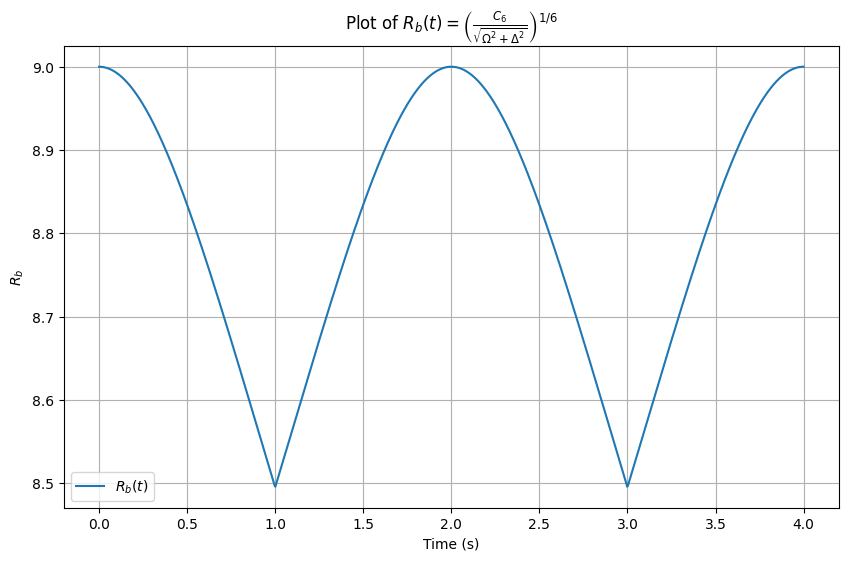

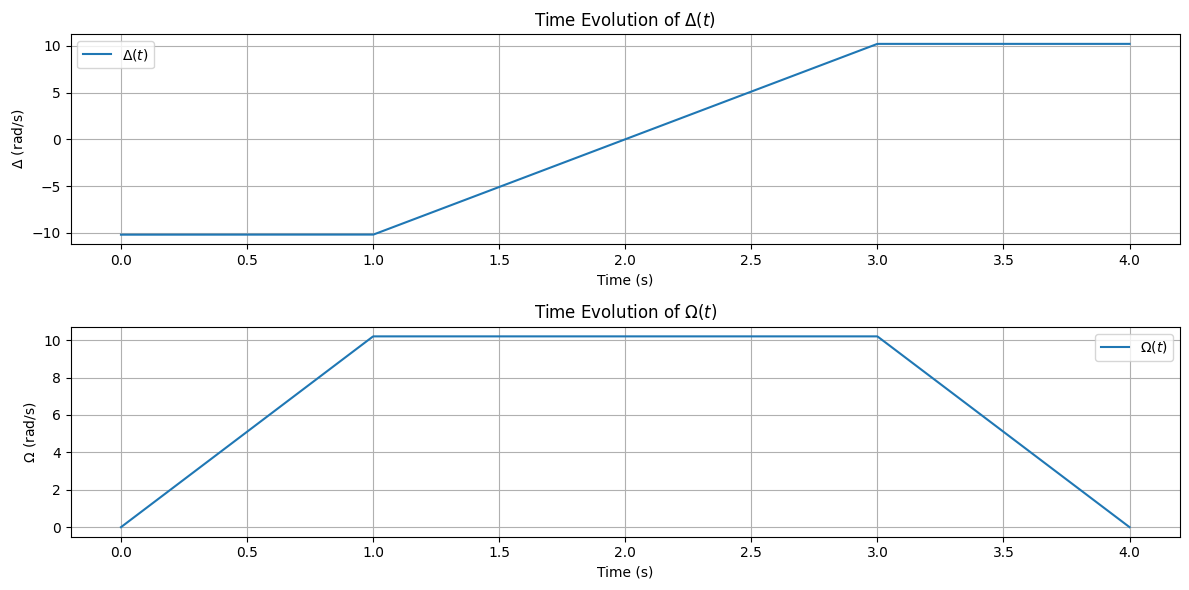

5420000.0


In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Define the piecewise_linear function
def piecewise_linear(durations, values):
    time = [0]
    for d in durations:
        time.append(time[-1] + d)
    time = np.array(time)  # Full time array matches values length
    values = np.array(values)
    return lambda t: np.interp(t, time, values)


def getMHz(Rb, C6 = float(get_capabilities().capabilities.rydberg.c6_coefficient)):
    return C6 / (Rb ** 6)

Rb = 9
omega_MHz_value = getMHz(Rb)
# Constants
C6 =  C6 = float(get_capabilities().capabilities.rydberg.c6_coefficient)
omega_MHz = [0.0, omega_MHz_value, omega_MHz_value, 0.0]
delta_MHz = [-omega_MHz_value, -omega_MHz_value,  omega_MHz_value, omega_MHz_value]
durations = [1, 2, 1]

# Compute Omega and Delta in radians
Delta = piecewise_linear(durations, [x for x in delta_MHz])
Omega = piecewise_linear(durations, [x for x in omega_MHz])

# Time array
t = np.linspace(0, sum(durations), 1000)

# Compute Rb
Omega_vals = Omega(t)
Delta_vals = Delta(t)
Rb = (C6 / np.sqrt(Omega_vals**2 + Delta_vals**2))**(1/6)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(t, Rb, label=r"$R_b(t)$")
plt.xlabel("Time (s)")
plt.ylabel(r"$R_b$")
plt.title(r"Plot of $R_b(t) = \left(\frac{C_6}{\sqrt{\Omega^2 + \Delta^2}}\right)^{1/6}$")
plt.legend()
plt.grid(True)
plt.show()
# Plotting Delta and Omega
plt.figure(figsize=(12, 6))

# Delta
plt.subplot(2, 1, 1)
plt.plot(t, Delta_vals, label=r"$\Delta(t)$", linestyle='-', marker='')
plt.xlabel("Time (s)")
plt.ylabel(r"$\Delta$ (rad/s)")
plt.title(r"Time Evolution of $\Delta(t)$")
plt.grid(True)
plt.legend()

# Omega
plt.subplot(2, 1, 2)
plt.plot(t, Omega_vals, label=r"$\Omega(t)$", linestyle='-', marker='')
plt.xlabel("Time (s)")
plt.ylabel(r"$\Omega$ (rad/s)")
plt.title(r"Time Evolution of $\Omega(t)$")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()
print(C6)


In [15]:
(C6/((-1)*Delta_vals[0]))**(1/6)

8.999999999999998

In [16]:
omega_MHz_value

10.19868621352135

In [17]:
C6/(9**6)

10.19868621352135

In [18]:
Rb[0]

8.999999999999998

In [19]:
print(get_capabilities())


version='0.6' capabilities=DeviceCapabilities(task=TaskCapabilities(number_shots_min=1, number_shots_max=1000), lattice=LatticeCapabilities(number_qubits_max=256, area=LatticeAreaCapabilities(width=Decimal('75'), height=Decimal('76')), geometry=LatticeGeometryCapabilities(spacing_radial_min=Decimal('4'), spacing_vertical_min=Decimal('4'), position_resolution=Decimal('0.1'), number_sites_max=256)), rydberg=RydbergCapabilities(c6_coefficient=Decimal('5.42E+6'), global_=RydbergGlobalCapabilities(rabi_frequency_min=Decimal('0E-7'), rabi_frequency_max=Decimal('15.8000000'), rabi_frequency_resolution=Decimal('0.0004000'), rabi_frequency_slew_rate_max=Decimal('250.0000000000000'), detuning_min=Decimal('-125.0000000'), detuning_max=Decimal('125.0000000'), detuning_resolution=Decimal('2E-7'), detuning_slew_rate_max=Decimal('2500.0000000000000'), phase_min=Decimal('-99.0'), phase_max=Decimal('99.0'), phase_resolution=Decimal('5E-7'), time_min=Decimal('0E+5'), time_max=Decimal('4'), time_resoluti